<a href="https://colab.research.google.com/github/akshaya-nagarajan/DeepLearningProjects/blob/master/Assignment_2/DLImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks.hooks import *

bs = 64

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'DeepLearningProjects'

Mounted at /content/gdrive


In [0]:
#!pip install "torch==1.4" "torchvision==0.5.0"

In [0]:
createfolder = Path(base_dir + '/fastai')
createfolder.mkdir(parents=True, exist_ok=True)

In [6]:
help(URLs)

Help on class URLs in module fastai.datasets:

class URLs(builtins.object)
 |  Global constants for dataset and model URLs.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  ADULT_SAMPLE = 'http://files.fast.ai/data/examples/adult_sample'
 |  
 |  AG_NEWS = 'https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv'
 |  
 |  AMAZON_REVIEWS = 'https://s3.amazonaws.com/fast-ai-nlp/amazon_review_f...
 |  
 |  AMAZON_REVIEWS_POLARITY = 'https://s3.amazonaws.com/fast-ai-nlp/amazon...
 |  
 |  BIWI_HEAD_POSE = 'https://s3.amazonaws.com/fast-ai-imagelocal/biwi_hea...
 |  
 |  BIWI_SAMPLE = 'http://files.fast.ai/data/examples/biwi_sample'
 |  
 |  CALTECH_101 = 'https://s3.amazonaws.com/fast-ai-imageclas/caltech_101'
 |  
 |  CAMVI

#### Download the dataset

In [0]:
path = untar_data(URLs.FOOD , dest=createfolder)

#### Other folders in dataset

In [8]:
path.ls()

[PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/train.json'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/test.json'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/images'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/meta'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/models'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/train'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/test'),
 PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/imagesfood_classifier.pkl')]

In [9]:
path_img = path/'images'
path_img

PosixPath('/content/gdrive/My Drive/DeepLearningProjects/fastai/food-101/images')

#### For not flipping the image randomly

In [0]:
tfms = get_transforms(do_flip=False)

1.   Path : path of the images 
2.   Split_by_rand_pct() : Splitting training and validation dataset
3.   Label_from_folder() : For getting tha labels of data
4.   transform(): for transforming the image
5.   databunch(): for converting to data bunch

In [0]:
data = (ImageList.from_folder(path=path).split_by_rand_pct().label_from_folder().transform(tfms, size=224).databunch())

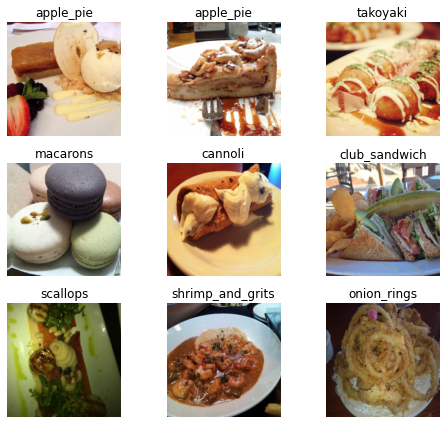

In [12]:
data.show_batch(rows=3, figsize=(7,6))

#### Get all the image categories

In [13]:
print(data.classes)

['apple_pie', 'beef_tartare', 'cannoli', 'club_sandwich', 'dumplings', 'french_onion_soup', 'frozen_yogurt', 'grilled_salmon', 'gyoza', 'lasagna', 'macarons', 'onion_rings', 'pho', 'prime_rib', 'ramen', 'scallops', 'shrimp_and_grits', 'takoyaki', 'tuna_tartare', 'waffles']


#### Normalize the image

In [14]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (16420 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
frozen_yogurt,frozen_yogurt,frozen_yogurt,frozen_yogurt,frozen_yogurt
Path: /content/gdrive/My Drive/DeepLearningProjects/fastai/food-101;

Valid: LabelList (4104 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tuna_tartare,macarons,waffles,grilled_salmon,apple_pie
Path: /content/gdrive/My Drive/DeepLearningProjects/fastai/food-101;

Test: None

#### Convolutional Neural Network learner, with resnet 34 as base architecture, accuracy as metric for checking model performance

In [15]:
learn = cnn_learner(data, base_arch=models.resnet34, metrics= accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

### Train the model

In [17]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.380045,0.899094,0.728558,1:19:55
1,0.952202,0.689122,0.791910,07:04
2,0.761514,0.638025,0.803119,06:59


In [0]:
learn.save('stage-1')

In [19]:
inter = ClassificationInterpretation.from_learner(learn)

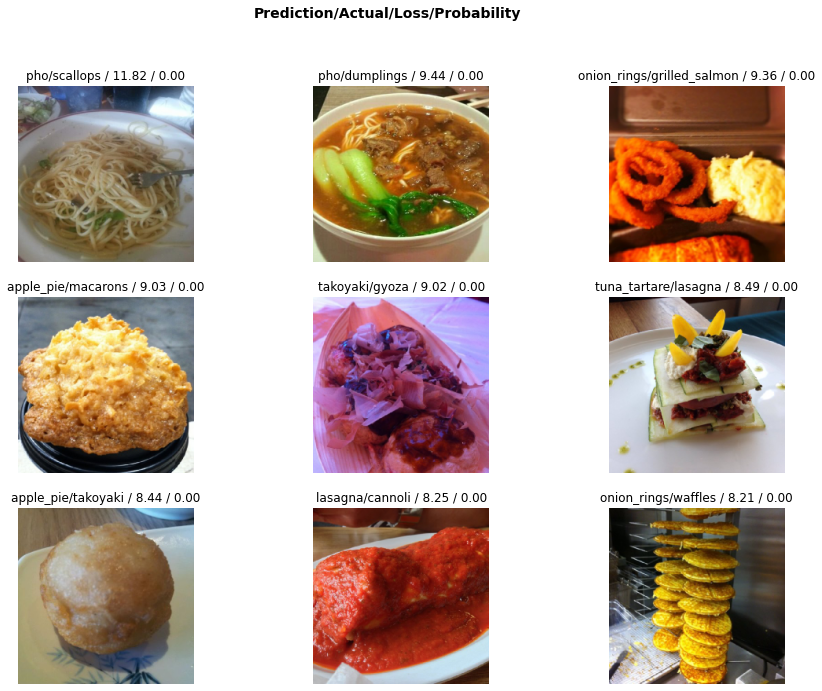

In [20]:
inter.plot_top_losses(9, figsize=(15, 11))

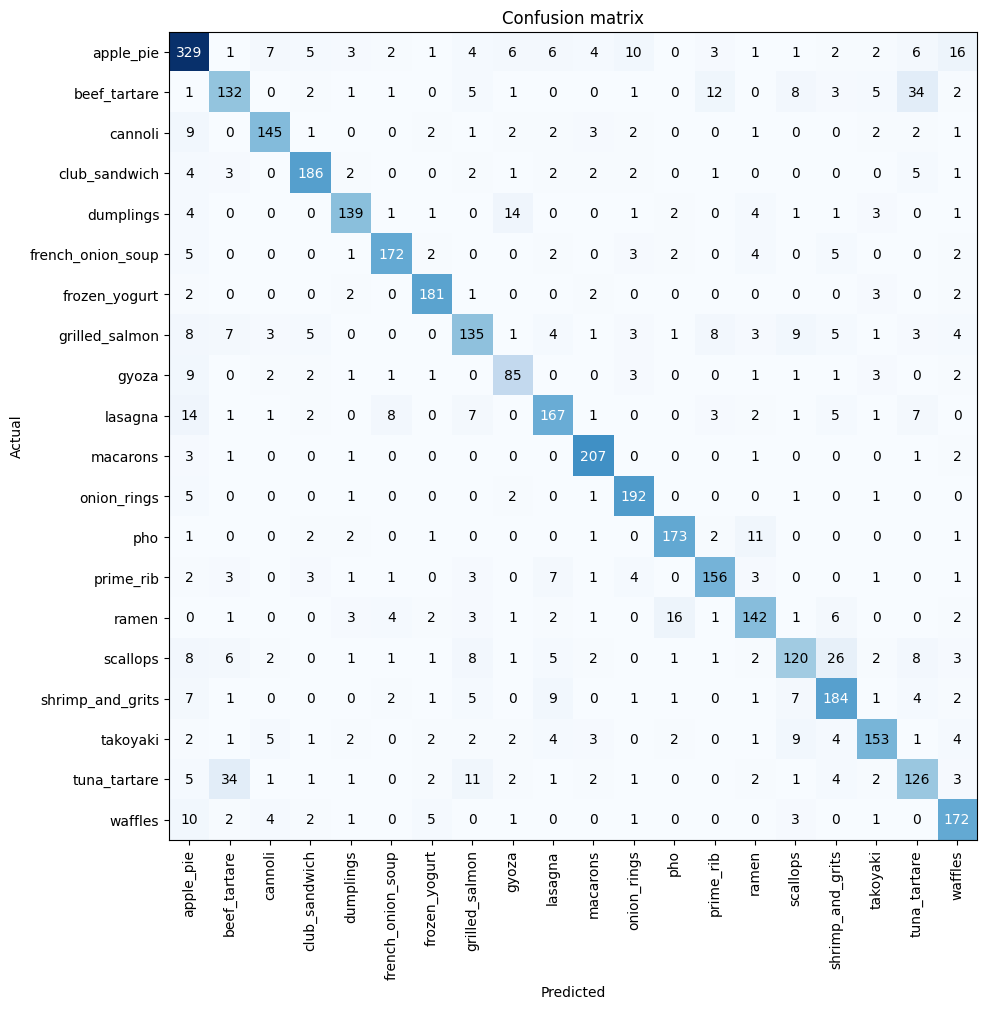

In [21]:
inter.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [0]:
# learn.save('/content/gdrive/My Drive/DeepLearningProjects/export')

In [0]:
# learn.export('/content/gdrive/My Drive/DeepLearningProjects/export.pkl')